In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

import imageio
from imageio import get_reader

In [7]:
mov = get_reader("nerves_part.tiff")

In [25]:
frames = []
for i, item in enumerate(mov):
    if i < 400:
        frames.append(item)
frames = np.array(frames)

## Visualise the film:

In [23]:
def playMovie(frames):
    %matplotlib tk
    fig, ax = plt.subplots(1,1)
    for frame in frames:
        ax.cla()
        ax.imshow(frame)
        plt.pause(0.01)
    plt.close()
    %matplotlib inline
    return
playMovie(frames)

## Do MRF segmentation of the first frame:

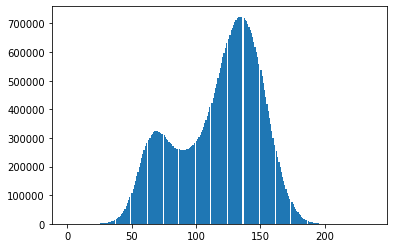

In [10]:
%matplotlib inline
def segmentationHistogram(img_noise):
    plt.hist(img_noise.flatten(), bins=255)
    plt.show()
    return
segmentationHistogram(frames)

In [11]:
import maxflow
mu1 = 60.0
mu2 = 130.0

In [12]:
beta=60
f = frames[0]

# Create the graph.
g = maxflow.Graph[int]()
# Add the nodes. nodeids has the identifiers of the nodes in the grid.
nodeids = g.add_grid_nodes(f.shape)

# Create matrix describing neigbourhood structure:
structure=np.array([[0,1,0],
                    [1,0,1],
                    [0,1,0]])

# Add non-terminal edges with the same capacity.
g.add_grid_edges(nodeids, weights=beta, structure=structure, symmetric=True)

source_capacity = (mu1 - f)**2 #relies on first class
sink_capacity = (mu2 - f)**2 #relies on second class
# Note: 0.38 and 0.68 is determined from the histograms

# Add the terminal edges (likelihood weights):
g.add_grid_tedges(nodeids, source_capacity, sink_capacity)

In [13]:
# Find the maximum flow.
print("Maxflow: ", g.maxflow())
# Get the segments of the nodes in the grid.
sgm = g.get_grid_segments(nodeids)
print(sgm)

Maxflow:  45009176
[[ True  True  True ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 ...
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]]


C:\Users\aabil\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


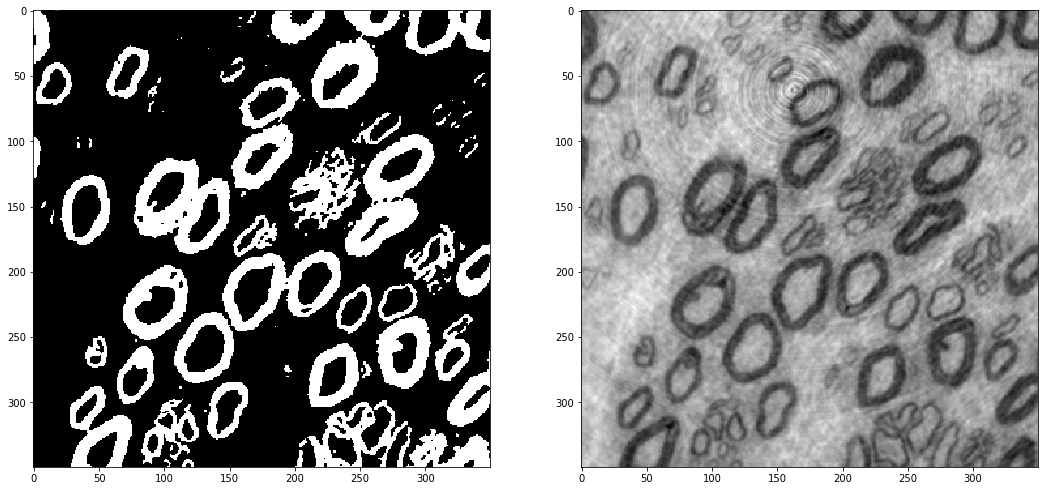

In [14]:
%matplotlib inline
fig3, f3_axes = plt.subplots(ncols=2, nrows=1, constrained_layout=False, figsize=(18,12))
f3_axes[1].imshow(f, cmap = "gray")
f3_axes[0].imshow(sgm, cmap = "gray")
fig3.show()

## We try 3d MRF modelling of the nerves

In [15]:
beta = 20
g = maxflow.Graph[float]()
nodeids = g.add_grid_nodes(frames.shape)
print(nodeids.shape)

(400, 350, 350)


In [16]:
top_bot = np.array([[0,0,0],
                    [0,10,0],
                    [0,0,0]])
mid = np.array([[0,1,0],
                [1,0,1],
                [0,1,0]])
structure = np.array([top_bot, mid, top_bot])
print(structure)

[[[ 0  0  0]
  [ 0 10  0]
  [ 0  0  0]]

 [[ 0  1  0]
  [ 1  0  1]
  [ 0  1  0]]

 [[ 0  0  0]
  [ 0 10  0]
  [ 0  0  0]]]


In [17]:
# Add non-terminal edges with the same capacity.
g.add_grid_edges(nodeids, weights=beta, structure=structure, symmetric=True)

source_capacity = (mu1 - frames)**2 #relies on first class
sink_capacity = (mu2 - frames)**2 #relies on second class

# Add the terminal edges (likelihood weights):
g.add_grid_tedges(nodeids, source_capacity, sink_capacity)

In [18]:
# Find the maximum flow.
print("Maxflow: ", g.maxflow())
# Get the segments of the nodes in the grid.
sgm = g.get_grid_segments(nodeids)

Maxflow:  17989602519.0


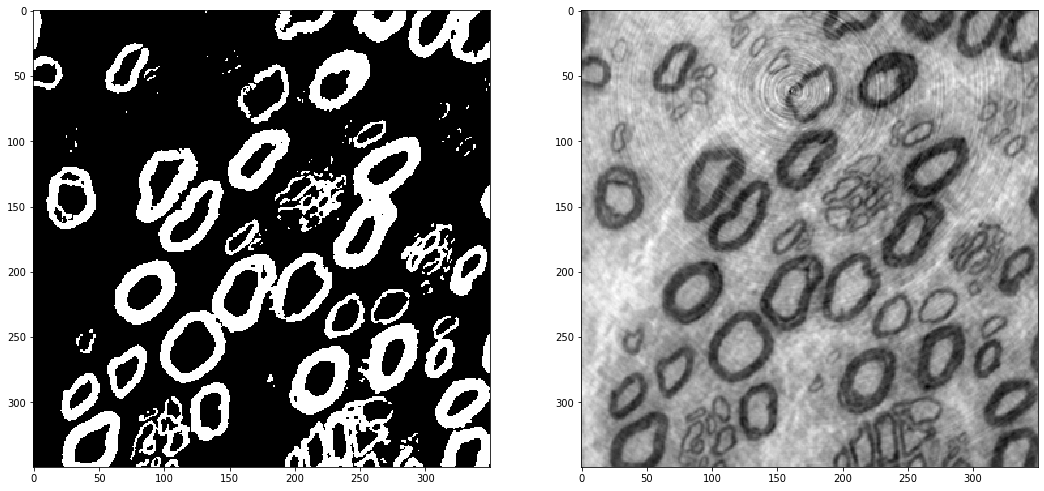

In [317]:
fig3, f3_axes = plt.subplots(ncols=2, nrows=1, constrained_layout=False, figsize=(18,12))
f3_axes[1].imshow(frames[49], cmap = "gray")
f3_axes[0].imshow(sgm[49], cmap = "gray")
fig3.show()

In [26]:
def playMovie(fr, mov):
    %matplotlib tk
    fig, ax = plt.subplots(1,2)
    for i in range(400):
        ax[1].cla()
        ax[0].cla()
        ax[1].imshow(mov[i])
        ax[0].imshow(fr[i])
        plt.pause(0.1)
    plt.close()
    %matplotlib inline
    return

In [27]:
playMovie(sgm, frames)

In [97]:
plt.close()

In [259]:
%matplotlib inline